<a href="https://colab.research.google.com/github/its-noob-me/projects/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

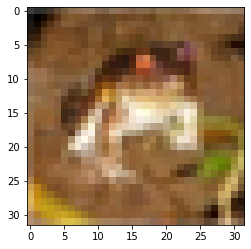

In [ ]:
plt.imshow(x_train[0])


In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x,y,index):
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

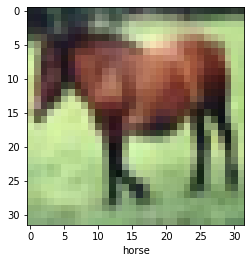

In [ ]:
plot_sample(x_train,y_train,7)

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
#building the model with artificial neural network
ann = models.Sequential([
        layers.Flatten(input_shape = (32,32,3)),
        layers.Dense(3000, activation = 'relu'),
        layers.Dense(1000, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 8s 3ms/step - loss: 1.8104 - accuracy: 0.3519
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6238 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5386 - accuracy: 0.4578
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4797 - accuracy: 0.4794
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4302 - accuracy: 0.4963


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.57      0.55      1000
           1       0.68      0.53      0.59      1000
           2       0.54      0.09      0.15      1000
           3       0.34      0.31      0.33      1000
           4       0.47      0.35      0.40      1000
           5       0.36      0.42      0.39      1000
           6       0.49      0.62      0.55      1000
           7       0.49      0.62      0.55      1000
           8       0.57      0.65      0.61      1000
           9       0.46      0.70      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



In [ ]:
#building the model with convolultional neural network
cnn = models.Sequential([
        #cnn
        layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
        layers.MaxPooling2D((2,2)),

        #dense
        layers.Flatten(),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(10, activation = 'sigmoid')
])

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 14s 3ms/step - loss: 1.4596 - accuracy: 0.4748
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1130 - accuracy: 0.6093
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9883 - accuracy: 0.6545
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9039 - accuracy: 0.6838
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8366 - accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7817 - accuracy: 0.7267
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7308 - accuracy: 0.7459
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6871 - accuracy: 0.7599
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6507 - accuracy: 0.7744
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.61

In [ ]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.67      0.71      1000
           1       0.87      0.74      0.80      1000
           2       0.63      0.59      0.61      1000
           3       0.55      0.42      0.47      1000
           4       0.64      0.64      0.64      1000
           5       0.54      0.67      0.60      1000
           6       0.80      0.72      0.76      1000
           7       0.73      0.73      0.73      1000
           8       0.75      0.85      0.80      1000
           9       0.67      0.87      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

